<a href="https://colab.research.google.com/github/OSway/McKenzie-Hackathon/blob/master/McKinsey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.linear_model import Ridge

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Uploading dataset

In [ ]:
# uncomment if uploading locally

train_data_path = '/content/train.csv'
test_data_path = '/content/test.csv'
# sub_data_path = '/content/sample_submit.csv'

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
# sub = pd.read_csv(sub_data_path)

In [ ]:
train.tail(10)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
3855,1015056,NGC 2366,0.942393,77.787047,14458.508309,0.677131,13.516310,14.937129,0.916229,0.781201,122.783465,92.271993,140.312767,36.639631,964.705198,44.193101,92.548446,62.841908,9.211275,489.714140,75.330845,80.5

In [ ]:
train.shape

(3865, 80)

In [ ]:
# rows, containing nans 
train.isnull().any(axis = 1).sum()


3531

In [ ]:
# sum of nans in column
miss = train.isnull().sum()
print(miss.to_string())

galactic year                                                                                 0
galaxy                                                                                        0
existence expectancy index                                                                    1
existence expectancy at birth                                                                 1
Gross income per capita                                                                      28
Income Index                                                                                 28
Expected years of education (galactic years)                                                133
Mean years of education (galactic years)                                                    363
Intergalactic Development Index (IDI)                                                       391
Education Index                                                                             391
Intergalactic Development Index (IDI), R

In [ ]:
sub.head()

,index,pred,opt_pred
0,0,0.08,100
1,1,0.08,100
2,2,0.08,100
3,3,0.08,100
4,4,0.08,100


In [ ]:
all_n_idx = train.index[train.isnull().all(1)]
all_n_idx

Int64Index([], dtype='int64')

**Graph**

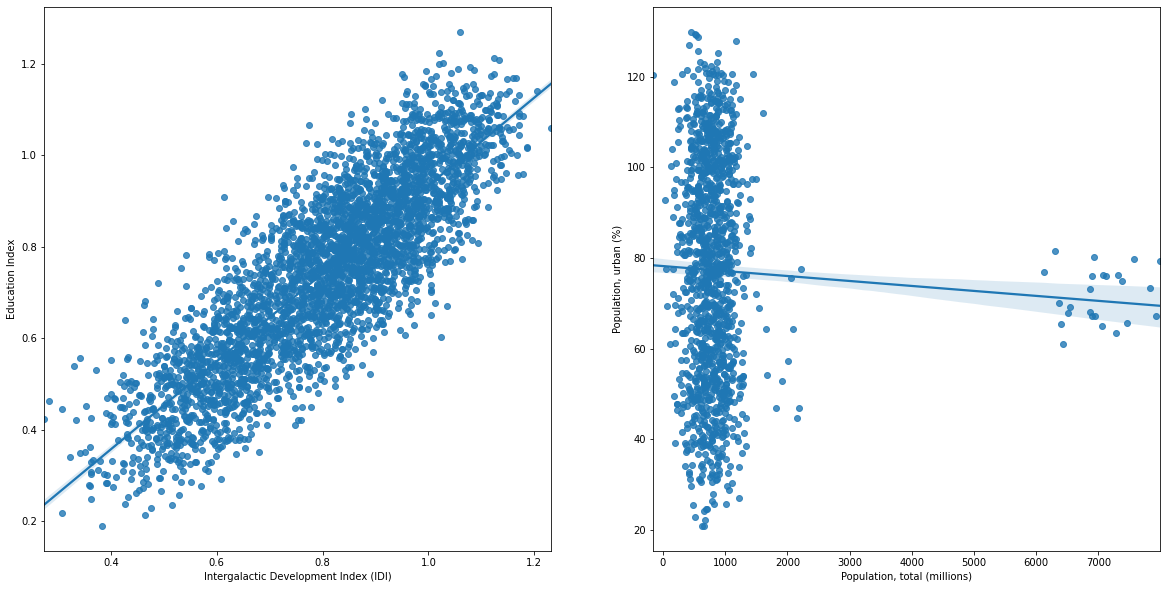

In [ ]:
fig, axs = plt.subplots(ncols = 2)
fig.set_figwidth(20)
fig.set_figheight(10)

sns.regplot(x = "Intergalactic Development Index (IDI)",y = "Education Index", data = train, ax=axs[0]) 
sns.regplot(x = "Population, total (millions)",y = "Population, urban (%)", data = train, ax = axs[1]) 

In [ ]:
train.shape

(3865, 80)

In [ ]:
y = train['y']
X = train.iloc[:, 2:-1]
  

**Filling NaNs**

In [ ]:
X.head()

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,174.617899,NaN,NaN,NaN,NaN,79.614066,73.0

In [ ]:
f_imputation = X.columns[:9] 
X = X[f_imputation]
X = X.fillna(X.mean())
X.head()

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank"
0,0.628657,63.125200,27109.234310,0.646039,8.240543,10.283959,0.804246,0.745900,135.129178
1,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198
2,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266
3,0.555862,52.333293,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178
4,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345


In [ ]:

scaler = StandardScaler()

X = scaler.fit_transform(X)

X

array([[-1.50186836, -1.30712404, -0.24148723, ...,         nan,
                nan,         nan],
       [-0.33506628,  0.40217618, -0.07827756, ...,         nan,
         0.01525336,         nan],
       [-1.31223435, -1.64694856, -1.23794234, ...,  0.01894852,
                nan,         nan],
       ...,
       [ 1.00812774,  1.60054334,  0.28663153, ..., -0.2600881 ,
         0.28797173, -1.1517472 ],
       [ 0.40996133,  0.14113514, -0.18430622, ..., -0.7473228 ,
         0.14467509,  0.54041972],
       [ 0.98410697,  1.41900748,  2.21394871, ...,         nan,
         0.22423285, -0.08279226]])

#Models

In [ ]:
def model_acc(model, features, target):
  model_scores = cross_val_score(model, features, target,
                              cv=5,
                              scoring='neg_root_mean_squared_error', # sklearn regression metrics
                              n_jobs=5, 
                              )
  acc = model_scores.mean()
  return abs(acc)


**LGB & KN**

In [ ]:
LGB_MODEL = LGBMRegressor(learning_rate = 0.005, 
                     boosting_type = 'gbdt', 
                     max_depth = 7,
                     num_leaves = 50,
                     n_estimators = 300,
                     use_missing=True)

KN_MODEL = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')

In [ ]:
# lgb_acc = model_acc(LGB_MODEL, X, y)
kn_acc = model_acc(KN_MODEL, X, y)

**SVR**

In [ ]:
# SVR
SVR_MODEL = SVR()

svr_acc = model_acc(SVR_MODEL, X, y)

**RIDGE**

In [ ]:
# Ridge
RIDGE_MODEL = Ridge(alpha=1.0,
                    fit_intercept=True,
                    normalize=False,
                    copy_X=True,
                    max_iter=1000,
                    tol=0.001,
                    solver='auto',
                    random_state=None)


In [ ]:
ridge_acc = model_acc(RIDGE_MODEL, X, y)

**Accuracy CMP**

In [ ]:
# print(f"LGB acc: {lgb_acc}")
print(f"KN acc: {kn_acc}")
# print(f"SVR acc: {svr_acc}")
# print(f"Ridge acc: {ridge_acc}")

KN acc: 0.033416930221331374


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)
X_train.shape

(3092, 9)

In [ ]:
keras_model = Sequential()

keras_model.add(Dense(700, activation='relu', input_dim=9))
keras_model.add(Dense(400, activation='relu'))
keras_model.add(Dense(350, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(50, activation='relu'))
keras_model.add(Dense(25, activation='relu'))

keras_model.add(Dense(1))

# Compiling the neural network
keras_model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=[keras.metrics.RootMeanSquaredError()])


In [ ]:
keras_model.fit(X_train, y_train,
          batch_size=10,
          epochs=30,
          validation_split = 0.2)

Epoch 1/30
248/248 [==============================] - 1s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 2/30
248/248 [==============================] - 1s 5ms/step - loss: 9.7932e-04 - root_mean_squared_error: 0.0313 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 3/30
248/248 [==============================] - 1s 5ms/step - loss: 9.3808e-04 - root_mean_squared_error: 0.0306 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 4/30
248/248 [==============================] - 1s 5ms/step - loss: 8.5091e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 5/30
248/248 [==============================] - 1s 5ms/step - loss: 9.2026e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0436
Epoch 6/30
248/248 [==============================] - 1s 5ms/step - loss: 8.5911e-04 - root_mean_squared_error: 0.0293 - val

In [ ]:
k_preds = keras_model.predict(X_val)
k_rms = sqrt(mean_squared_error(y_val, k_preds))

In [ ]:
k_rms

0.0356941118662377

In [ ]:
test.shape

(890, 79)

In [ ]:
test.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
test.isnull().any(axis = 1).sum()

656

In [ ]:
test_miss = test.isnull().sum()
print(test_miss.to_string())

galactic year                                                                                0
galaxy                                                                                       0
existence expectancy index                                                                   5
existence expectancy at birth                                                                5
Gross income per capita                                                                      5
Income Index                                                                                 5
Expected years of education (galactic years)                                                 5
Mean years of education (galactic years)                                                     8
Intergalactic Development Index (IDI)                                                        8
Education Index                                                                              8
Intergalactic Development Index (IDI), Rank       

In [ ]:
# f_imputation = test.columns[:9] 
# X = X[f_imputation]
# X = X.fillna(X.mean())
# X.head()

test = test.fillna(test.mean())
test.tail()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
885,1016064,ESO 383-087 (ISG 39),0.923881,79.93837,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,147.296372,103.269112,101.54067,33.175416,822.599136,79.710012,83.867147,55.640782,19.822029,521.57853,59.670

In [ ]:
new_test = test.iloc[:, 2:]
new_test.shape 

(890, 77)

In [ ]:
new_test.tail()

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank"
885,0.923881,79.93837,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,147.296372
886,0.923881,79.93837,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,147.296372
887,0.923881,79.93837,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,147.296372
888,0.923881,79.93837,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,147.296372
889,0.923881,79.93837,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,147.296372


In [ ]:
new_test = scaler.fit_transform(new_test)

# 2 zadacha

In [ ]:
LGB_MODEL.fit(X, y)
preds = LGB_MODEL.predict(new_test)


In [ ]:
eei = test['existence expectancy index']   
(eei < 0.7).sum()  

66

In [ ]:
sub = pd.DataFrame({'index': test.index, 'eei': eei, 'pred': preds})
sub

,index,eei,pred
0,0,0.456086,0.044369
1,1,0.529835,0.044345
2,2,0.560976,0.044345
3,3,0.565910,0.044345
4,4,0.588274,0.048995
...,...,...,...
885,885,0.923881,0.059178
886,886,0.923881,0.059178
887,887,0.923881,0.059178
888,888,0.923881,0.059178


In [ ]:
sub['potential'] = -np.log(sub['pred']+0.01)+3
sub

,index,eei,pred,potential
0,0,0.456086,0.044369,5.911964
1,1,0.529835,0.044345,5.912395
2,2,0.560976,0.044345,5.912395
3,3,0.565910,0.044345,5.912395
4,4,0.588274,0.048995,5.830301
...,...,...,...,...
885,885,0.923881,0.059178,5.671079
886,886,0.923881,0.059178,5.671079
887,887,0.923881,0.059178,5.671079
888,888,0.923881,0.059178,5.671079


In [ ]:
f_group = sub.loc[sub['eei'] < 0.7]
f_group

,index,eei,pred,potential
0,0,0.456086,0.044369,5.911964
1,1,0.529835,0.044345,5.912395
2,2,0.560976,0.044345,5.912395
3,3,0.565910,0.044345,5.912395
4,4,0.588274,0.048995,5.830301
...,...,...,...,...
61,61,0.686832,0.047729,5.851991
62,62,0.688025,0.043773,5.922988
63,63,0.692317,0.041831,5.959763
64,64,0.698337,0.046989,5.864893


In [ ]:
f_m_pot = f_group['potential'].mean()
f_group['d_potential'] = f_group['potential'] - f_m_pot


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
s_group = sub.loc[sub['eei'] >= 0.7]
s_group

,index,eei,pred,potential
66,66,0.703955,0.044345,5.912395
67,67,0.704373,0.049393,5.823582
68,68,0.705427,0.043924,5.920186
69,69,0.707466,0.048944,5.831166
70,70,0.713987,0.048885,5.832164
...,...,...,...,...
885,885,0.923881,0.059178,5.671079
886,886,0.923881,0.059178,5.671079
887,887,0.923881,0.059178,5.671079
888,888,0.923881,0.059178,5.671079


In [ ]:
s_m_pot = s_group['potential'].mean()
s_group['d_potential'] = s_group['potential'] - s_m_pot
s_group

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,eei,pred,potential,d_potential
66,66,0.703955,0.044345,5.912395,0.446313
67,67,0.704373,0.049393,5.823582,0.357500
68,68,0.705427,0.043924,5.920186,0.454104
69,69,0.707466,0.048944,5.831166,0.365085
70,70,0.713987,0.048885,5.832164,0.366083
...,...,...,...,...,...
885,885,0.923881,0.059178,5.671079,0.204998
886,886,0.923881,0.059178,5.671079,0.204998
887,887,0.923881,0.059178,5.671079,0.204998
888,888,0.923881,0.059178,5.671079,0.204998


In [ ]:
neg_f_group = f_group.loc[f_group['d_potential'] < 0]
pos_f_group = f_group.loc[f_group['d_potential'] > 0]
pos_f_group.head()

,index,eei,pred,potential,d_potential
0,0,0.456086,0.044369,5.911964,0.036896
1,1,0.529835,0.044345,5.912395,0.037326
2,2,0.560976,0.044345,5.912395,0.037326
3,3,0.565910,0.044345,5.912395,0.037326
5,5,0.589654,0.040432,5.987130,0.112062


In [ ]:
neg_s_group = s_group.loc[s_group['d_potential'] < 0]
pos_s_group = s_group.loc[s_group['d_potential'] > 0]
neg_s_group.tail()

,index,eei,pred,potential,d_potential
880,880,1.169012,0.189801,4.610435,-0.855646
881,881,1.173076,0.122904,5.018130,-0.447951
882,882,1.196506,0.122460,5.021474,-0.444607
883,883,1.199043,0.177494,4.674011,-0.792070
884,884,1.250508,0.188745,4.615735,-0.850347


In [ ]:
# серединные распределения энергии
Threshold_left = 75.7575
Threshold_right = 61

In [ ]:
# используем для пропорции (... = 12.62)
nf_max = neg_f_group['d_potential'].min()
pf_max = pos_f_group['d_potential'].max()
pf_max

0.121149916347707

In [ ]:
Threshold_left +  12.12125

100.0

In [ ]:
neg_f_group['opt_pred'] = Threshold_left + (abs(neg_f_group['d_potential']) * 24.2425)/abs(nf_max)
pos_f_group['opt_pred'] = Threshold_left - (pos_f_group['d_potential'] *  14.2425)/pf_max

f_group = pd.concat([neg_f_group, pos_f_group])
f_sum = f_group['opt_pred'].sum()
f_sum  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5072.5652750726895

In [ ]:
ns_max = neg_s_group['d_potential'].min()
ps_max = pos_s_group['d_potential'].max()

In [ ]:
neg_s_group['opt_pred'] = Threshold_right  + (abs(neg_s_group['d_potential']) * 37.1)/abs(ns_max)
pos_s_group['opt_pred'] = Threshold_right  - (pos_s_group['d_potential'] * 37.1)/ps_max

s_group = pd.concat([neg_s_group, pos_s_group])
s_sum = s_group['opt_pred'].sum()
s_sum  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


44591.562496411076

In [ ]:
sub = pd.concat([f_group, s_group])
sub = sub.drop(['eei', 'potential', 'd_potential'], axis=1)
sub = sub.sort_index()
sub

,index,pred,opt_pred
0,0,0.044369,71.419991
1,1,0.044345,71.369401
2,2,0.044345,71.369401
3,3,0.044345,71.369401
4,4,0.048995,82.791905
...,...,...,...
885,885,0.059178,47.128616
886,886,0.059178,47.128616
887,887,0.059178,47.128616
888,888,0.059178,47.128616


In [ ]:
sub['opt_pred'].sum()

49664.12777148377

In [ ]:
sub.to_csv('submission_7.csv', index=False)